<a href="https://colab.research.google.com/github/nmuonko/My-Projects/blob/main/Suicide_Rates_Overview_1985_to_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats
! pip install pycountry
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import pycountry
import geopandas

In [21]:
data = pd.read_csv('/content/master.csv')
df= data

In [22]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [23]:
data.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


In [24]:
data["gdp_for_year"] = data["gdp_for_year"].str.replace(",","").astype(np.int64)
data["age"] = data["age"].str.replace("5-14 years","05-14 years")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


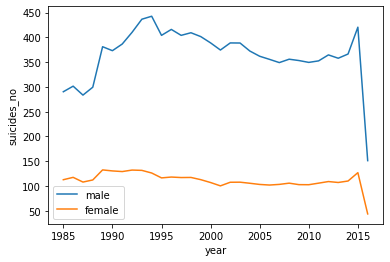

In [25]:
data_men = data[data.sex == "male"]
data_women = data[data.sex == "female"]
sns.lineplot(data_men.year, data.suicides_no, ci = None)
sns.lineplot(data_women.year, data.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

<ipython-input-26-79536a78dd45>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_age = data.groupby(["year","age"])["suicides_no", "population"].sum()
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


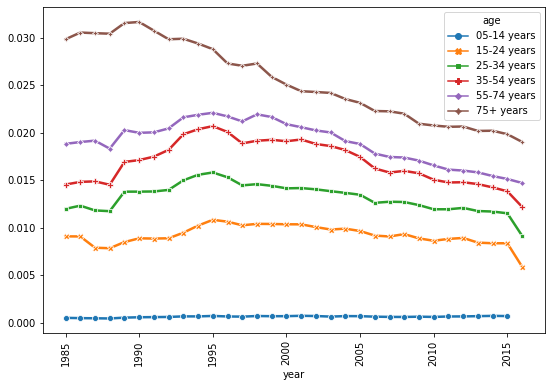

In [26]:
data_age = data.groupby(["year","age"])["suicides_no", "population"].sum()
data_reset = data_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", data_reset.suicides_no*100/data_reset.population, hue = "age",
             data = data_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

In [27]:
data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides_pop          0
country-year          0
HDI_for_year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [28]:
data.drop('HDI_for_year', axis=1, inplace=True)

In [29]:
data.head()

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers


In [30]:
str(data)

'          country  year     sex          age  suicides_no  population  \\\n0         Albania  1987    male  15-24 years           21      312900   \n1         Albania  1987    male  35-54 years           16      308000   \n2         Albania  1987  female  15-24 years           14      289700   \n3         Albania  1987    male    75+ years            1       21800   \n4         Albania  1987    male  25-34 years            9      274300   \n...           ...   ...     ...          ...          ...         ...   \n27815  Uzbekistan  2014  female  35-54 years          107     3620833   \n27816  Uzbekistan  2014  female    75+ years            9      348465   \n27817  Uzbekistan  2014    male  05-14 years           60     2762158   \n27818  Uzbekistan  2014  female  05-14 years           44     2631600   \n27819  Uzbekistan  2014  female  55-74 years           21     1438935   \n\n       suicides_pop    country-year  gdp_for_year  gdp_per_capita  \\\n0              6.71     Albania1987  

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_pop    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   gdp_for_year    27820 non-null  int64  
 9   gdp_per_capita  27820 non-null  int64  
 10  generation      27820 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.3+ MB


<ipython-input-32-35ca861835cf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_generation = df.groupby(["year", "generation"])["suicides_no", "population"].sum()
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


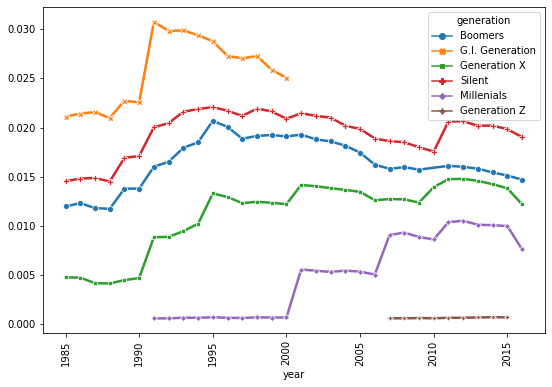

In [32]:
df_generation = df.groupby(["year", "generation"])["suicides_no", "population"].sum()
df_generation_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_generation_reset.suicides_no*100/df_generation_reset.population, hue = "generation", 
            data = df_generation_reset, linewidth = 2.5, style = "generation", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()



In [33]:
df1 = df.groupby("country")["suicides_no"].sum()
country_name = list(df1.index.get_level_values(0))
len(country_name)

101

In [37]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

In [38]:
country_not_in_list = [i for i in country_name[:] if i not in countries.keys()]
country_not_in_list

['Czech Republic',
 'Macau',
 'Republic of Korea',
 'Saint Vincent and Grenadines']

In [39]:
df.replace("Republic of Korea", "Korea, Republic of", inplace = True)
df.replace('Czech Republic', "Czechia", inplace = True)
df.replace('Macau', 'Macao', inplace = True)
df.replace('Saint Vincent and Grenadines', "Saint Vincent and the Grenadines", inplace = True)

In [40]:
df_suino = df.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum
df_total.head(10)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
dtype: float64

In [41]:
country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

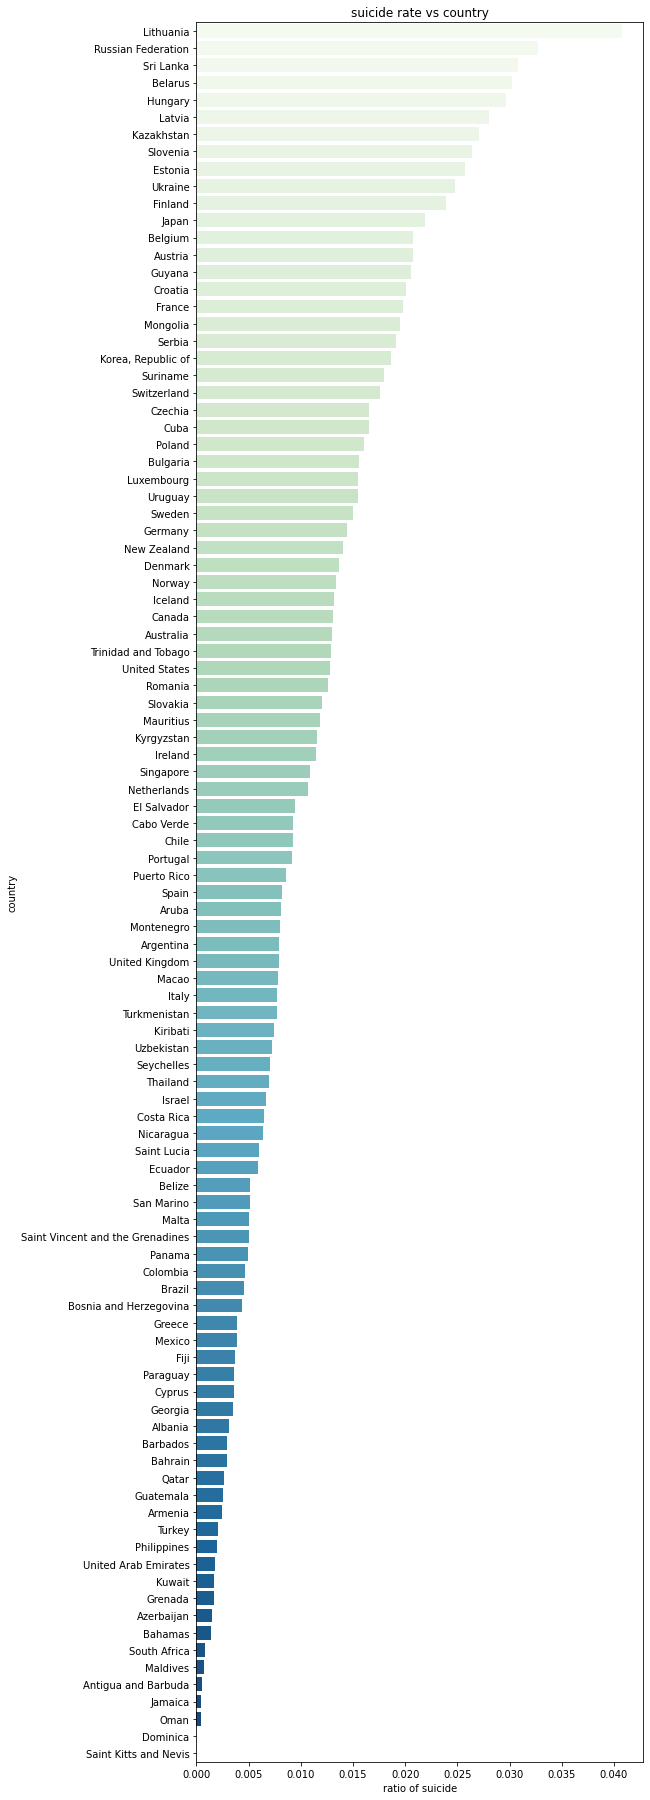

In [43]:
plt.figure(figsize=(8,32))
sns.barplot(x=country_suicide[:],y=country_list[:], palette="GnBu")
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("suicide rate vs country")
plt.show()

In [44]:
country_dict = dict()
for idx in range(len(country_list)):
    country_dict[countries[country_list[idx]]] = country_suicide[idx]

In [45]:
new_country_dict = {}
new_country_dict["iso_a3"] = list(country_dict.keys())
new_country_dict["suicide_rate"] = list(country_dict.values())
new_country_df = pd.DataFrame(new_country_dict)
new_country_df.head()

,iso_a3,suicide_rate
0,LTU,0.040736
1,RUS,0.032703
2,LKA,0.030848
3,BLR,0.030231
4,HUN,0.029617


In [46]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [47]:
result = pd.merge(world, new_country_df, on = "iso_a3")
result.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,suicide_rate
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.003708
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.013131
2,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.012835
3,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",0.027041
4,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",0.007232


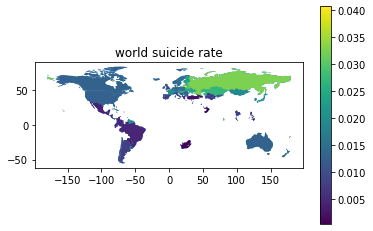

In [48]:
ax = result.plot()
ax.set_title("world suicide rate")
result.plot(column='suicide_rate', ax = ax, legend=True)

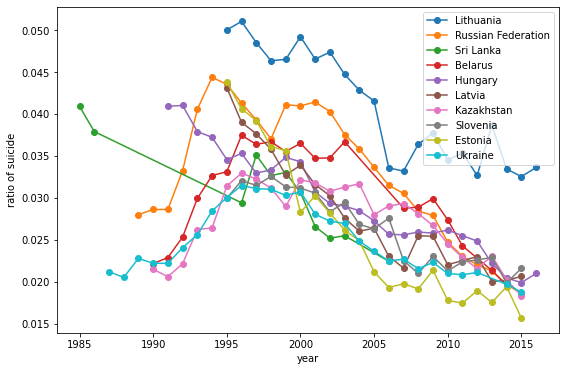

In [49]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.legend()
plt.show()

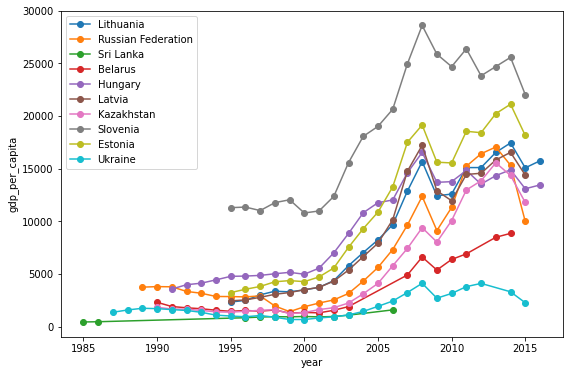

In [50]:
plt.figure(figsize = (9,6))
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
for country in country_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

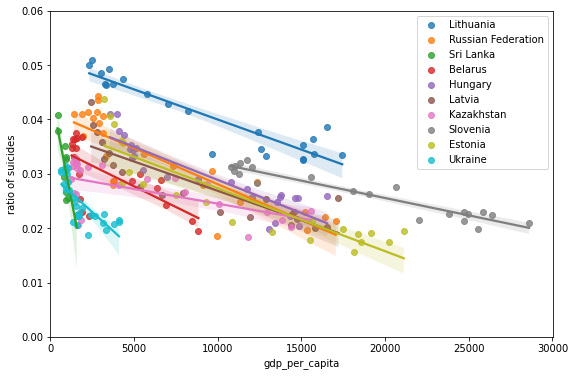

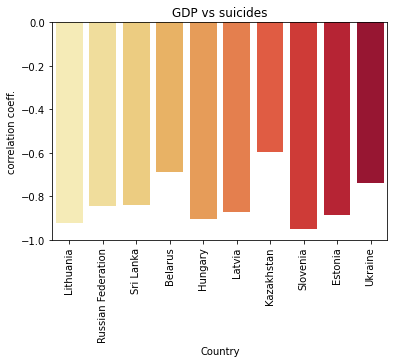

In [51]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    sns.regplot(x=df_gdp[country].values, y=df_total[country].values, label = country)
plt.xlabel("gdp_per_capita")
plt.ylabel("ratio of suicides")
plt.ylim(0,0.06)
plt.xlim(0)
plt.legend()
plt.show()

corr_eff = {}
for country in country_list[:10]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values,df_total[country].values)
    corr_eff[country] = float(r_value)
    
sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


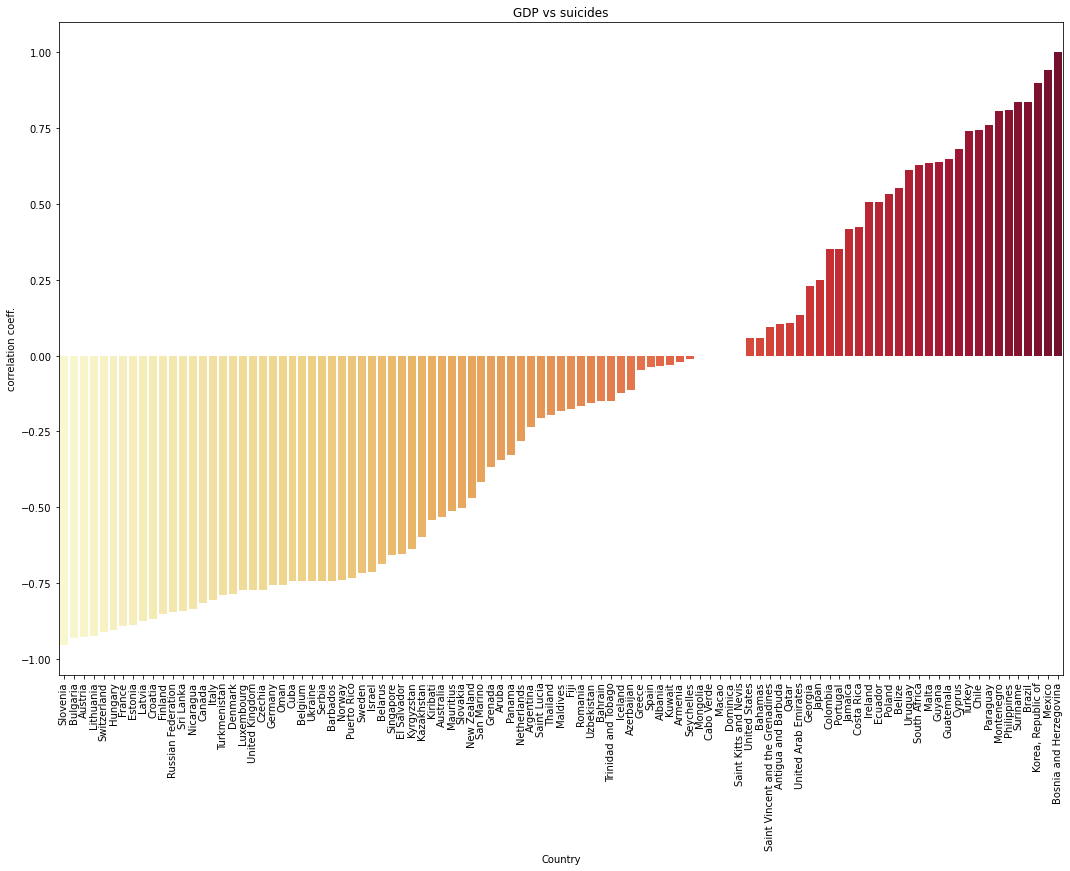

In [53]:
corr_eff = {}
p_value_eff = {}
for country in country_list[:]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values, df_total[country].values)
    corr_eff[country] = float(r_value)
    p_value_eff[country] = float(p_value)

gdp_tup = list(corr_eff.items())
gdp_tup.sort(key= lambda pair:pair[1], reverse = False)
dgp_relation = {a[0]:a[1] for a in gdp_tup}

plt.figure(figsize=(18,12))
sns.barplot(x=list(dgp_relation.keys()), y=list(dgp_relation.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

In [54]:
high_relation_gdp = {a:b for a,b in dgp_relation.items() if b <= -0.6}
print(len(high_relation_gdp))
high_relation_gdp

36


{'Slovenia': -0.9529455791278115,
 'Bulgaria': -0.9287679102475701,
 'Austria': -0.9259200512084546,
 'Lithuania': -0.9239757987267332,
 'Switzerland': -0.9109503853299822,
 'Hungary': -0.9040354533627301,
 'France': -0.891033016219988,
 'Estonia': -0.8871441228139314,
 'Latvia': -0.8730699831833395,
 'Croatia': -0.8688905854455011,
 'Finland': -0.8510603475107353,
 'Russian Federation': -0.8447320241371793,
 'Sri Lanka': -0.8423723520534465,
 'Nicaragua': -0.8339461195785591,
 'Canada': -0.8137269827924933,
 'Italy': -0.8058989652804354,
 'Turkmenistan': -0.789798470389873,
 'Denmark': -0.785030750255649,
 'Luxembourg': -0.7712677174711061,
 'United Kingdom': -0.7709229981372079,
 'Czechia': -0.7706689026781656,
 'Germany': -0.7567584036061585,
 'Oman': -0.7547353920453065,
 'Cuba': -0.7437036777206897,
 'Belgium': -0.7416790406841788,
 'Ukraine': -0.7413562367777868,
 'Serbia': -0.7411928190991895,
 'Barbados': -0.7409526707249006,
 'Norway': -0.7406431335510837,
 'Puerto Rico': -0.7

In [55]:
positive_relation_gdp = {a:b for a,b in corr_eff.items() if b > 0.6}
positive_relation_tup = list(positive_relation_gdp.items())
positive_relation_tup.sort(key= lambda pair:pair[1], reverse = True)
positive_relation = {a[0]:a[1] for a in positive_relation_tup}
print(len(positive_relation))
positive_relation

16


{'Bosnia and Herzegovina': 0.9999999999999999,
 'Mexico': 0.9392731898535472,
 'Korea, Republic of': 0.8967892885653613,
 'Brazil': 0.8356111067311864,
 'Suriname': 0.8333078326024657,
 'Philippines': 0.8099497394094539,
 'Montenegro': 0.8042382321252367,
 'Paraguay': 0.7599968993976424,
 'Chile': 0.7412265208253951,
 'Turkey': 0.7398789818429371,
 'Cyprus': 0.6812947745988278,
 'Guatemala': 0.6460477591267608,
 'Guyana': 0.6379567025207803,
 'Malta': 0.6334189190517482,
 'South Africa': 0.6287573335302014,
 'Uruguay': 0.61206046817105}

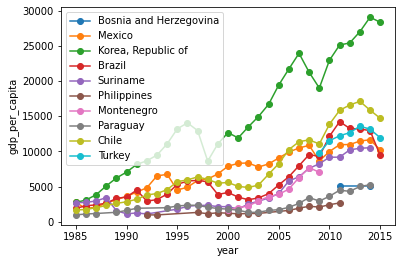

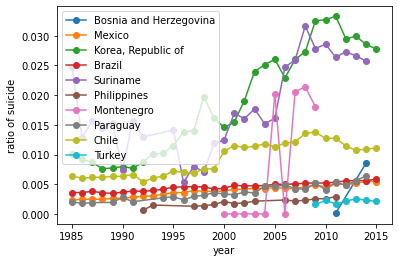

In [56]:
city_list = list({a:b for a,b in positive_relation.items()})
for country in city_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

for country in city_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.legend()
plt.show()


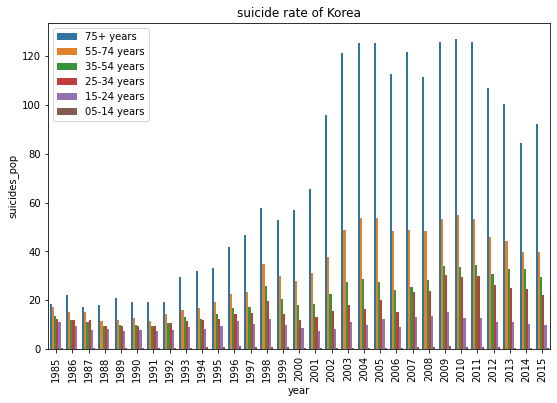

In [57]:
plt.figure(figsize = (9,6))
sns.barplot(x="year", y="suicides_pop", hue="age",
            ci = None,data = (df[df["country"] == "Korea, Republic of"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of Korea" )
plt.legend()    
plt.show()

In [58]:
without_relation_gdp = {a:b for a,b in corr_eff.items() if -0.3 < b < 0.3}
no_relation_gdp = [i for i in country_list[:20] if i in without_relation_gdp.keys()]
no_relation_gdp

['Japan', 'Mongolia']

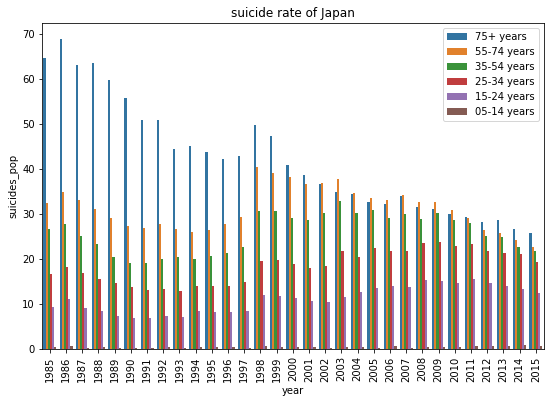

In [59]:
plt.figure(figsize = (9,6))
sns.barplot(x="year", y="suicides_pop", hue="age",
            ci = None,data = (df[df["country"] == "Japan"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of Japan" )
plt.legend()    
plt.show()


**Conclusion**

In general, the suicide rate is related to several factors. First, national GDP per person. We have seen that the suicide rate in many countries is highly correlated with the gdp of the whole country, which shows that the degree of national wealth has a certain degree of reduction in suicide rate.

Second, the age. According to the suicide rate of each level of age, the rate of elderly is higher, so young people should care more about the elderly. Moreover, the country welfare of the elderly may also impact the rate.

Third, the social pressure. A healthy society can make citizens feel safe and satisfied, so how to relieve the social pressure becomes a significant topic for every country. Our purpose is not only reduce the suicide rate but also to build a better world.


